# Fobes_2022_billioners


In [1]:
import seaborn as sns #gorsellestirme kutuphanesi (daha renkli)
import matplotlib.pyplot as plt  #gorsellestirme kutuphanesi
import pandas as pd
import numpy as np

#import warnings;
#warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("forbes_2022_billionaires.csv")
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2668 non-null   int64  
 1   personName            2668 non-null   object 
 2   age                   2582 non-null   float64
 3   finalWorth            2668 non-null   float64
 4   year                  2668 non-null   int64  
 5   month                 2668 non-null   int64  
 6   category              2668 non-null   object 
 7   source                2668 non-null   object 
 8   country               2655 non-null   object 
 9   state                 748 non-null    object 
 10  city                  2624 non-null   object 
 11  countryOfCitizenship  2668 non-null   object 
 12  organization          352 non-null    object 
 13  selfMade              2668 non-null   bool   
 14  gender                2652 non-null   object 
 15  birthDate            

In [104]:
df.shape

(2668, 22)

In [105]:
df.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio',
       'about'],
      dtype='object')

In [5]:
df = df.loc[:,["rank","personName", "age", "finalWorth", "category", "country", "gender", "title"]]
df.head()

,rank,personName,age,finalWorth,category,country,gender,title
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M,CEO
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M,Entrepreneur
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M,Chairman and CEO
3,4,Bill Gates,66.0,129000.0,Technology,United States,M,Cofounder
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,CEO


In [6]:
df = df.rename(columns = {"rank":"sira", "personName":"isim", "age":"yas", "finalWorth":"servet", "category":"kategori", "country":"ulke","gender":"cinsiyet", "title":"unvan"})
df.head()

,sira,isim,yas,servet,kategori,ulke,cinsiyet,unvan
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M,CEO
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M,Entrepreneur
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M,Chairman and CEO
3,4,Bill Gates,66.0,129000.0,Technology,United States,M,Cofounder
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,CEO


In [7]:
df = df.set_index("sira") # df in index lerini sira sutununun valuelari olarak atadik
df

,isim,yas,servet,kategori,ulke,cinsiyet,unvan
sira,,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M,CEO
2,Jeff Bezos,58.0,171000.0,Technology,United States,M,Entrepreneur
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M,Chairman and CEO
4,Bill Gates,66.0,129000.0,Technology,United States,M,Cofounder
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,CEO
...,...,...,...,...,...,...,...
2578,Zhang Yuqiang,66.0,1000.0,Manufacturing,China,M,NaN
2578,Zhou Ruxin,59.0,1000.0,Technology,China,M,NaN
2578,Wen Zhou & family,57.0,1000.0,Manufacturing,China,M,NaN


In [109]:
df.isnull().sum()

isim           0
yas           86
servet         0
kategori       0
ulke          13
cinsiyet      16
unvan       2267
dtype: int64

<Axes: ylabel='sira'>

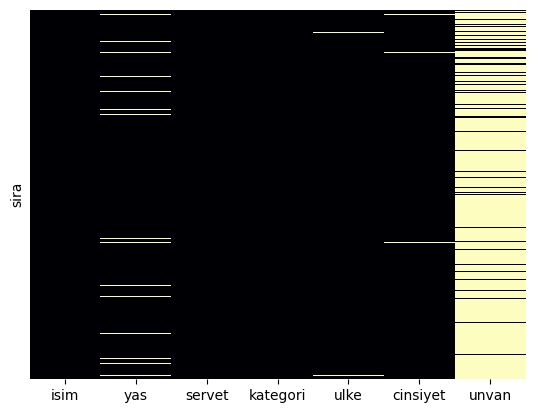

In [9]:
sns.heatmap(df.isnull(),     # Nan degerlerin dagilimina bakiyoruz, en fazla unvan da ve yas da var. 
            yticklabels=False,
            cbar=False,
            cmap='magma')

In [10]:
# df icinde ki butun satir ve sutunlari dolasip toplam nan,null degerleri her bir satir icin getirir. 

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)

    if na_name:
        return na_columns    

In [11]:
missing_values_table(df) # unvanin %85 missing_values dir...

          n_miss  ratio
unvan       2267  84.97
yas           86   3.22
cinsiyet      16   0.60
ulke          13   0.49


In [12]:
df.unvan.fillna("Billionair", inplace=True) # unvan sutununda bos olan yerlere "billionair dondurduk"

In [13]:
missing_values_table(df)

          n_miss  ratio
yas           86   3.22
cinsiyet      16   0.60
ulke          13   0.49


In [14]:
df.dropna(inplace = True) # kalan nan degerleride attik dropna ile. 

In [15]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [16]:
df.isnull().sum()

isim        0
yas         0
servet      0
kategori    0
ulke        0
cinsiyet    0
unvan       0
dtype: int64

## Cinsiyet dagilimina bakalim

In [17]:
df["cinsiyet"].value_counts(normalize=True)*100 # %89 male, %11 female

M    88.862928
F    11.137072
Name: cinsiyet, dtype: float64

In [119]:
df["cinsiyet"].value_counts() # man ve female sayilari 

M    2282
F     286
Name: cinsiyet, dtype: int64

In [18]:
x = df["cinsiyet"].value_counts().index
x

Index(['M', 'F'], dtype='object')

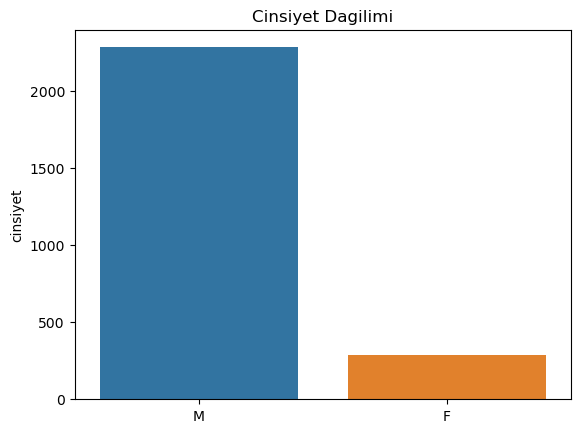

In [19]:
sns.barplot(x= df["cinsiyet"].value_counts().index,y= df["cinsiyet"].value_counts()) # x= ve y= yeni versionda konulmus
plt.title("Cinsiyet Dagilimi");


In [122]:
sns.__version__

'0.12.2'

In [123]:
df.head()

,isim,yas,servet,kategori,ulke,cinsiyet,unvan
sira,,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M,CEO
2,Jeff Bezos,58.0,171000.0,Technology,United States,M,Entrepreneur
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M,Chairman and CEO
4,Bill Gates,66.0,129000.0,Technology,United States,M,Cofounder
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,CEO


In [124]:
len(df[df["ulke"] == "Turkey"])

23

In [125]:
df["cinsiyet"].value_counts(normalize= True)* 100

M    88.862928
F    11.137072
Name: cinsiyet, dtype: float64

In [126]:
df[df["ulke"] == "Turkey"].cinsiyet.value_counts(normalize=True)

M    0.826087
F    0.173913
Name: cinsiyet, dtype: float64

In [127]:
df["ulke"].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Singapore',
       'Spain', 'Canada', 'Germany', 'Switzerland', 'Belgium',
       'Hong Kong', 'United Kingdom', 'Australia', 'Austria', 'Italy',
       'Japan', 'Bahamas', 'Indonesia', 'Chile', 'Russia', 'Sweden',
       'Czechia', 'Monaco', 'United Arab Emirates', 'Nigeria', 'Denmark',
       'Thailand', 'Malaysia', 'Brazil', 'Colombia', 'New Zealand',
       'South Korea', 'South Africa', 'Philippines', 'Egypt', 'Taiwan',
       'Israel', 'Vietnam', 'Poland', 'Norway', 'Cayman Islands',
       'Netherlands', 'Eswatini (Swaziland)', 'Peru', 'Algeria',
       'Kazakhstan', 'Georgia', 'Portugal', 'British Virgin Islands',
       'Turkey', 'Finland', 'Ukraine', 'Ireland', 'Bermuda', 'Lebanon',
       'Argentina', 'Cambodia', 'Oman', 'Guernsey', 'Liechtenstein',
       'Turks and Caicos Islands', 'Qatar', 'Morocco', 'Uruguay',
       'Slovakia', 'Romania', 'Nepal', 'Tanzania', 'Bahrain', 'Greece',
       'Hungary', 'Andorra']

In [128]:
len(df["ulke"].unique())

73

In [129]:
df[df["ulke"] == "Canada"].cinsiyet.value_counts(normalize=True)*100

M    95.238095
F     4.761905
Name: cinsiyet, dtype: float64

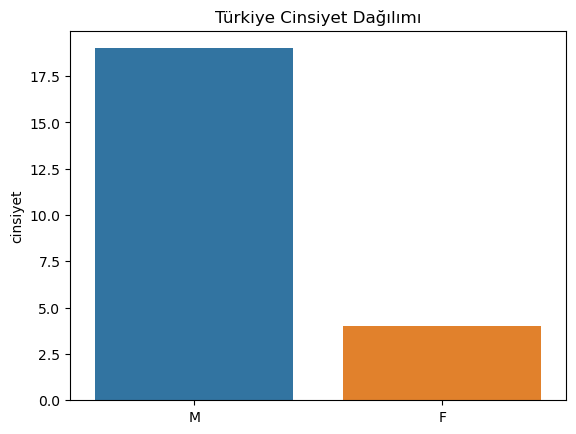

In [130]:
sns.barplot(x = df[df["ulke"] == "Turkey"].cinsiyet.value_counts().index, y = df[df["ulke"] == "Turkey"].cinsiyet.value_counts())
plt.title("Türkiye Cinsiyet Dağılımı") 
plt.show()

In [24]:
df[df["ulke"] == "Turkey"].cinsiyet.value_counts()

M    19
F     4
Name: cinsiyet, dtype: int64

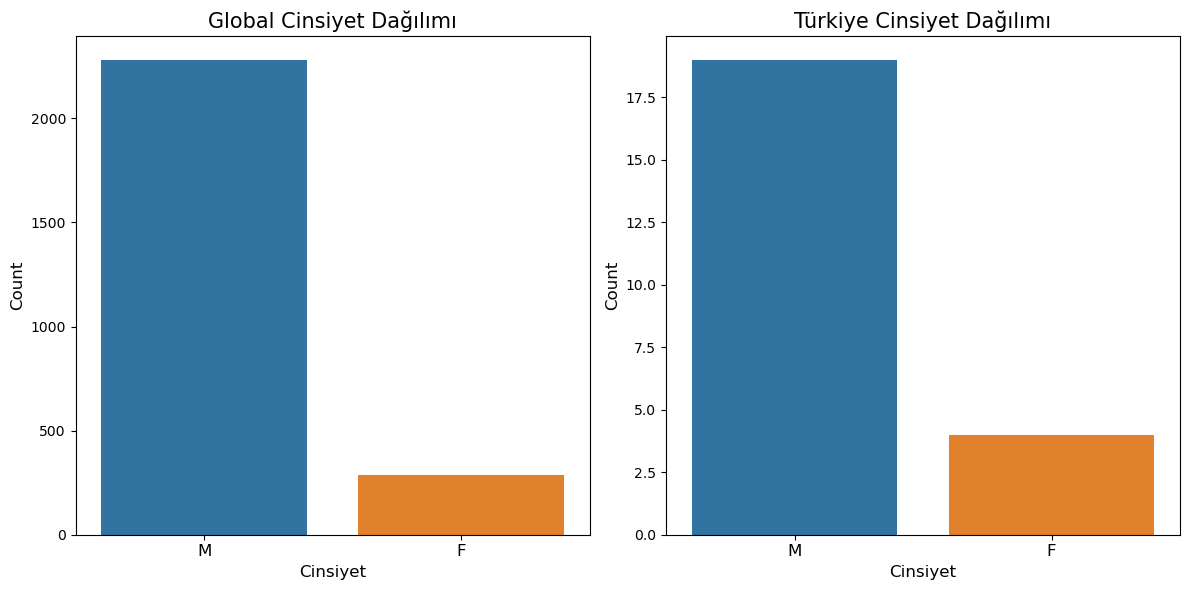

In [22]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)           #(121)de yazabiliyoruz
sns.barplot(x = df["cinsiyet"].value_counts().index, y = df["cinsiyet"].value_counts())
plt.title("Global Cinsiyet Dağılımı", fontsize = 15)
plt.xlabel("Cinsiyet", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(fontsize=12) # M ve F i buyutmek icin kullandik!

plt.subplot(1, 2, 2)
sns.barplot(x = df[df["ulke"] == "Turkey"].cinsiyet.value_counts().index, y = df[df["ulke"] == "Turkey"].cinsiyet.value_counts())
plt.title("Türkiye Cinsiyet Dağılımı", fontsize = 15)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Cinsiyet", fontsize = 12)
plt.xticks(fontsize=12)
 
plt.tight_layout(); 
plt.show()

In [132]:
df.head()

,isim,yas,servet,kategori,ulke,cinsiyet,unvan
sira,,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M,CEO
2,Jeff Bezos,58.0,171000.0,Technology,United States,M,Entrepreneur
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M,Chairman and CEO
4,Bill Gates,66.0,129000.0,Technology,United States,M,Cofounder
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,CEO


In [133]:
df["yas"].min()

25.0

In [134]:
df["yas"].nsmallest(5)

sira
1929    25.0
1929    25.0
2190    25.0
1929    26.0
2190    26.0
Name: yas, dtype: float64

In [135]:
df[df["yas"]==df["yas"].min()]

,isim,yas,servet,kategori,ulke,cinsiyet,unvan
sira,,,,,,,
1929,Pedro Franceschi,25.0,1500.0,Finance & Investments,United States,M,Cofounder
1929,Wang Zelong,25.0,1500.0,Metals & Mining,China,M,Billionair
2190,Alexandra Andresen,25.0,1300.0,Diversified,Norway,F,Billionair


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2568 entries, 1 to 2578
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      2568 non-null   object 
 1   yas       2568 non-null   float64
 2   servet    2568 non-null   float64
 3   kategori  2568 non-null   object 
 4   ulke      2568 non-null   object 
 5   cinsiyet  2568 non-null   object 
 6   unvan     2568 non-null   object 
dtypes: float64(2), object(5)
memory usage: 225.0+ KB


In [137]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yas,2568.0,64.245327,13.358522,25.0,55.0,64.0,74.0,100.0
servet,2568.0,4796.475857,10696.722292,1000.0,1500.0,2400.0,4400.0,219000.0


In [138]:
df[(df["yas"]==df["yas"].min()) & (df["ulke"] == "Turkey")] # bos, cunku en kucuk yasdaki billionars turkiyede degil. 

,isim,yas,servet,kategori,ulke,cinsiyet,unvan
sira,,,,,,,


In [25]:
df[df["ulke"] == "Turkey"]

,isim,yas,servet,kategori,ulke,cinsiyet,unvan
sira,,,,,,,
601,Murat Ulker,63.0,4700.0,Food & Beverage,Turkey,M,Billionair
1292,Ferit Faik Sahenk,58.0,2400.0,Diversified,Turkey,M,Billionair
1341,Erman Ilicak,54.0,2300.0,Construction & Engineering,Turkey,M,Billionair
1397,Filiz Sahenk,55.0,2200.0,Diversified,Turkey,F,Billionair
1579,Sezai Bacaksiz,72.0,1900.0,Diversified,Turkey,M,Billionair
1579,Nihat Ozdemir,72.0,1900.0,Diversified,Turkey,M,Billionair
1645,Ibrahim Erdemoglu,59.0,1800.0,Manufacturing,Turkey,M,Billionair
1818,Semahat Sevim Arsel,93.0,1600.0,Diversified,Turkey,F,Billionair
1929,Hamdi Akin & family,67.0,1500.0,Diversified,Turkey,M,Billionair


In [27]:
df_turkey = df[df["ulke"] == "Turkey"] # her sutunun min ini getirdi
df_turkey.min()

isim                       Ahmet Calik
yas                               37.0
servet                          1000.0
kategori    Construction & Engineering
ulke                            Turkey
cinsiyet                             F
unvan                       Billionair
dtype: object

In [30]:
df_turkey["yas"].min()

37.0

In [140]:
#na=False 
#plt.pie(values, labels=labels, autopct='%.2f') 

In [36]:
df["yas_aralığı"] = pd.cut(df["yas"], bins = [18,30,50,70,100], labels = ["18-30","30-50","50-70","70+"])
df.head()

,isim,yas,servet,kategori,ulke,cinsiyet,unvan,yas_aralığı
sira,,,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M,CEO,30-50
2,Jeff Bezos,58.0,171000.0,Technology,United States,M,Entrepreneur,50-70
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M,Chairman and CEO,70+
4,Bill Gates,66.0,129000.0,Technology,United States,M,Cofounder,50-70
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,CEO,70+


In [37]:
df["yas_aralığı"].value_counts() 

50-70    1353
70+       850
30-50     351
18-30      14
Name: yas_aralığı, dtype: int64

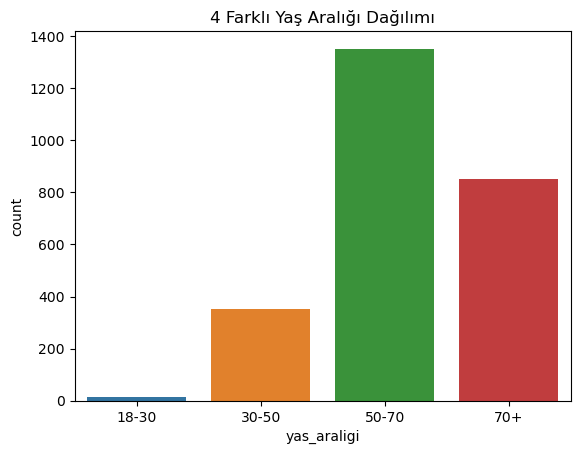

In [41]:
sns.barplot(x = df["yas_aralığı"].value_counts().index, y = df["yas_aralığı"].value_counts())
plt.title("4 Farklı Yaş Aralığı Dağılımı")
plt.xlabel("yas_araligi")
plt.ylabel("count")
plt.show()

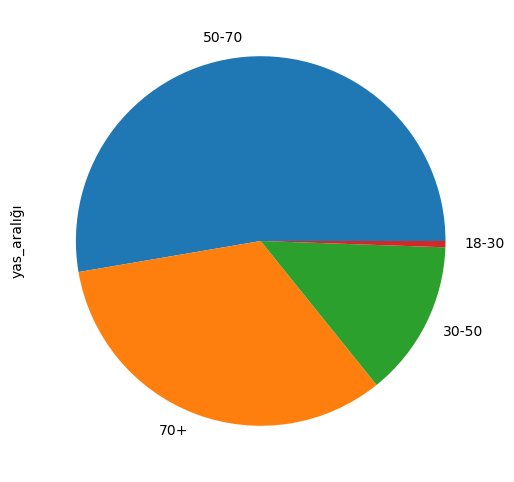

In [144]:
df["yas_aralığı"].value_counts().plot(kind = "pie", figsize = (6,6));

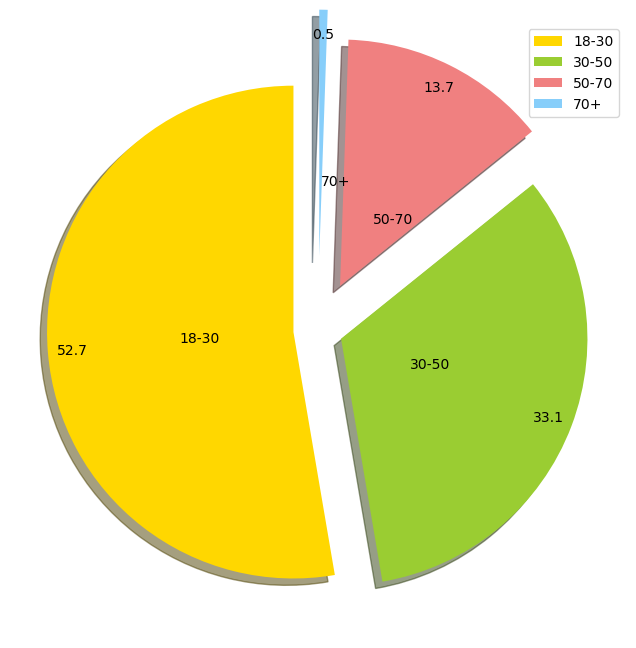

In [43]:
plt.figure(figsize=(10, 8))

color_list = ["gold", "yellowgreen", "lightcoral", "lightskyblue"]
explode_list = [0.1, 0.1, 0.2, 0.3]
mylabels = ["18-30","30-50","50-70","70+"]

y =df["yas_aralığı"].value_counts() 

plt.pie(y, labels = mylabels, labeldistance = 0.3, autopct="%.1f", startangle = 90, shadow = True, pctdistance=0.9, 
        colors=color_list, explode = explode_list)

plt.legend(loc=(0))
plt.show()

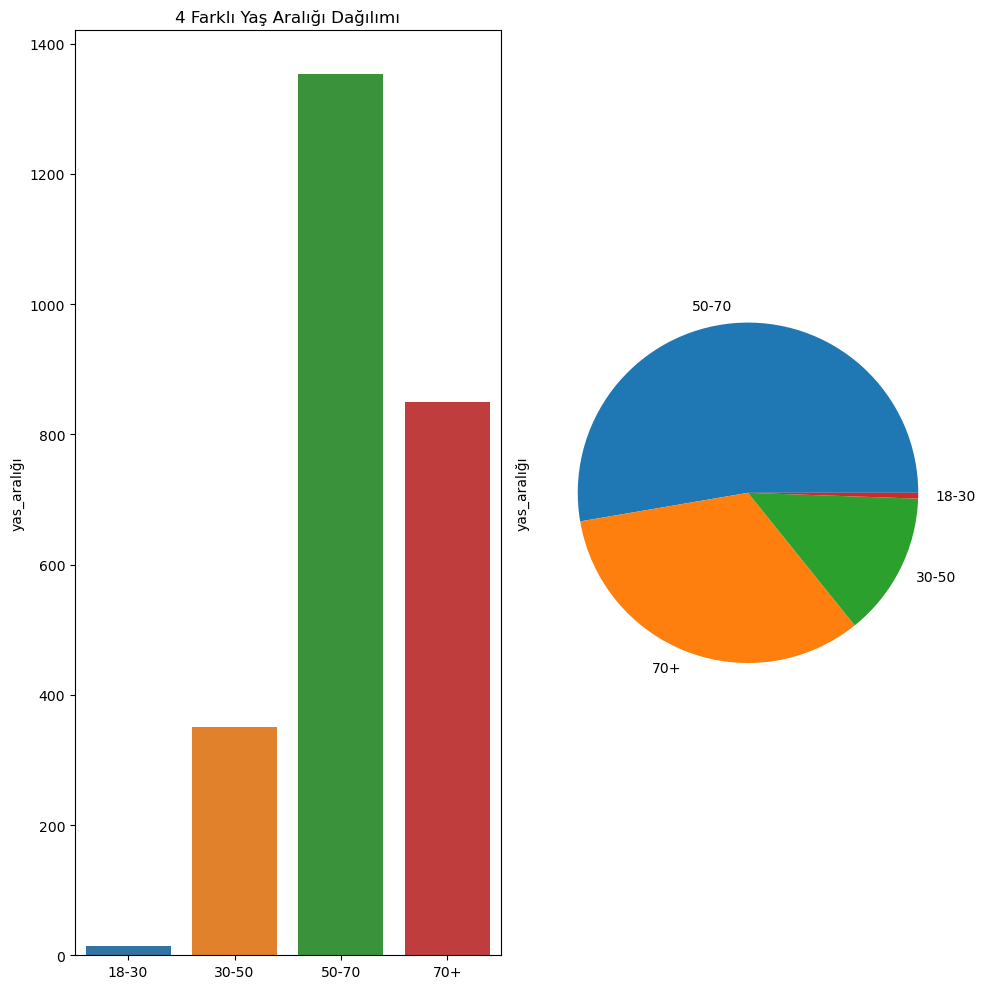

In [146]:
plt.figure(figsize = (10,8))

plt.subplot(121)
sns.barplot(x = df["yas_aralığı"].value_counts().index, y = df["yas_aralığı"].value_counts())
plt.title("4 Farklı Yaş Aralığı Dağılımı")

plt.subplot(122)
df["yas_aralığı"].value_counts().plot(kind = "pie", figsize = (10,10))

plt.tight_layout();
plt.show()

In [147]:
df["unvan"].value_counts().nlargest(20)

Billionair                        2173
Entrepreneur                        72
Investor                            43
Founder                             33
CEO                                 29
Cofounder                           27
Chairman                            27
Chairman and CEO                    24
Owner                                6
President                            6
Chief Executive Officer              5
Founder and Chairman                 5
Philanthropist                       5
Director                             5
Founder and CEO                      4
Investor, Philanthropist             4
Entrepreneur, Investor               3
Co-Chairman                          3
Cofounder and CEO                    3
Founder and Executive Chairman       3
Name: unvan, dtype: int64

In [148]:
CEO = df[df.unvan.str.contains("CEO|ceo", na = False)] # **contains** bu kelimenin gectigi satirlari getir demek!!!!! 
CEO

,isim,yas,servet,kategori,ulke,cinsiyet,unvan,yas_aralığı
sira,,,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M,CEO,30-50
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M,Chairman and CEO,70+
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,CEO,70+
12,Michael Bloomberg,80.0,82000.0,Media & Entertainment,United States,M,CEO,70+
16,Jim Walton,73.0,66200.0,Fashion & Retail,United States,M,Chairman and CEO,70+
...,...,...,...,...,...,...,...,...
2324,Lee Sang-ryul,60.0,1200.0,Manufacturing,South Korea,M,Co-CEO,50-70
2324,Leonard Schleifer,69.0,1200.0,Healthcare,United States,M,CEO and Founder,50-70
2448,Lloyd Blankfein,67.0,1100.0,Finance & Investments,United States,M,CEO,50-70


In [149]:
print("CEO yüzdelik dağılımı: ",CEO.shape[0] / df.shape[0] * 100) # Ceo nun yuzdeligi %3.35

CEO yüzdelik dağılımı:  3.348909657320872


In [150]:
df.head()

,isim,yas,servet,kategori,ulke,cinsiyet,unvan,yas_aralığı
sira,,,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M,CEO,30-50
2,Jeff Bezos,58.0,171000.0,Technology,United States,M,Entrepreneur,50-70
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M,Chairman and CEO,70+
4,Bill Gates,66.0,129000.0,Technology,United States,M,Cofounder,50-70
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,CEO,70+


<Axes: >

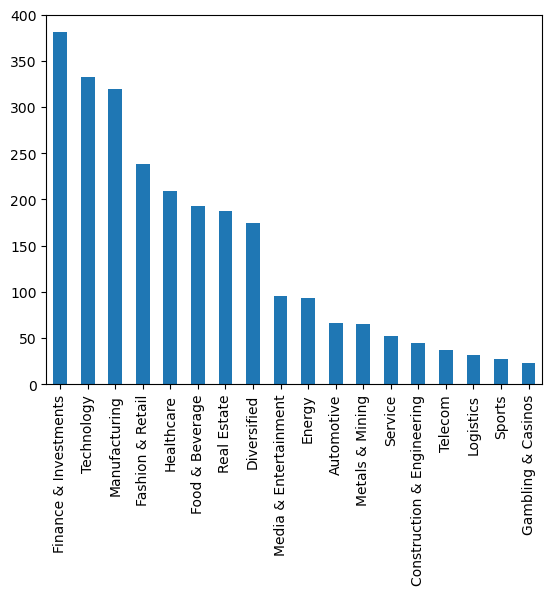

In [152]:
df["kategori"].value_counts().plot(kind = "bar")

# Dunyanin en zengin ilk 20 kisisi

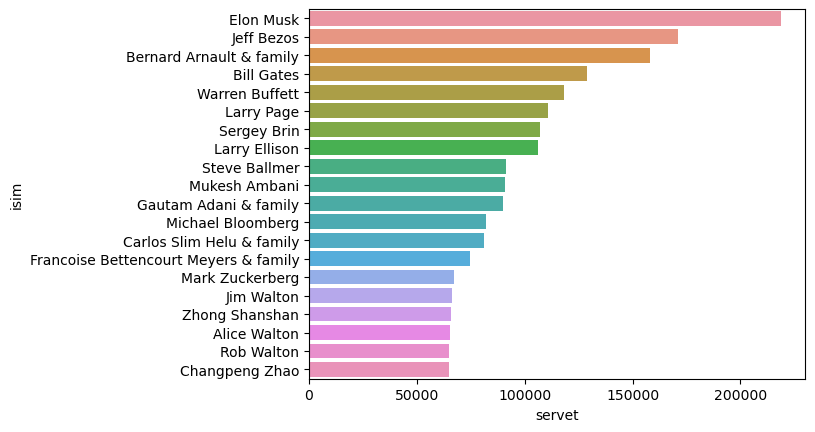

In [153]:
sns.barplot(y = df["isim"][:20], x = df["servet"][:20]);

In [154]:
len(df.ulke.unique())

73

In [155]:
df_ulke = df.groupby("ulke")

In [156]:
df_ulke_sayisi = pd.DataFrame(df_ulke.size().sort_values(ascending= False), columns=["sayi"])
df_ulke_sayisi

,sayi
ulke,
United States,742
China,546
India,154
Germany,94
United Kingdom,81
...,...
Andorra,1
Liechtenstein,1
Nepal,1


In [157]:
df_USA = df[df.ulke == "United States"] 
df_USA

,isim,yas,servet,kategori,ulke,cinsiyet,unvan,yas_aralığı
sira,,,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M,CEO,30-50
2,Jeff Bezos,58.0,171000.0,Technology,United States,M,Entrepreneur,50-70
4,Bill Gates,66.0,129000.0,Technology,United States,M,Cofounder,50-70
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,CEO,70+
6,Larry Page,49.0,111000.0,Technology,United States,M,Entrepreneur,30-50
...,...,...,...,...,...,...,...,...
2578,Mike Speiser,51.0,1000.0,Technology,United States,M,Managing Director,50-70
2578,Jeff Sprecher,67.0,1000.0,Finance & Investments,United States,M,Billionair,50-70
2578,Axel Stawski,71.0,1000.0,Real Estate,United States,M,Billionair,70+


In [158]:
df_China = df[df.ulke == "China"] 
df_China

,isim,yas,servet,kategori,ulke,cinsiyet,unvan,yas_aralığı
sira,,,,,,,,
17,Zhong Shanshan,67.0,65700.0,Food & Beverage,China,M,Billionair,50-70
25,Zhang Yiming,38.0,50000.0,Media & Entertainment,China,M,Founder,30-50
29,Robin Zeng,53.0,44800.0,Automotive,China,M,Billionair,50-70
34,Ma Huateng,50.0,37200.0,Technology,China,M,Chairman and CEO,30-50
49,He Xiangjian,79.0,28300.0,Manufacturing,China,M,Billionair,70+
...,...,...,...,...,...,...,...,...
2578,Zhang Yuqiang,66.0,1000.0,Manufacturing,China,M,Billionair,50-70
2578,Zhou Ruxin,59.0,1000.0,Technology,China,M,Billionair,50-70
2578,Wen Zhou & family,57.0,1000.0,Manufacturing,China,M,Billionair,50-70


In [159]:
df_India = df[df.ulke == "India"] 
df_India

,isim,yas,servet,kategori,ulke,cinsiyet,unvan,yas_aralığı
sira,,,,,,,,
10,Mukesh Ambani,64.0,90700.0,Diversified,India,M,Founder and Chairman,50-70
11,Gautam Adani & family,59.0,90000.0,Diversified,India,M,Billionair,50-70
47,Shiv Nadar,76.0,28700.0,Technology,India,M,Billionair,70+
56,Cyrus Poonawalla,80.0,24300.0,Healthcare,India,M,Billionair,70+
81,Radhakishan Damani,67.0,20000.0,Fashion & Retail,India,M,Billionair,50-70
...,...,...,...,...,...,...,...,...
2578,G.V. Prasad,61.0,1000.0,Healthcare,India,M,Billionair,50-70
2578,Jupally Rameshwar Rao,66.0,1000.0,Real Estate,India,M,Billionair,50-70
2578,Dhruv Sawhney,77.0,1000.0,Construction & Engineering,India,M,Billionair,70+


In [160]:
df_Germany = df[df.ulke == "Germany"] 
df_Germany

,isim,yas,servet,kategori,ulke,cinsiyet,unvan,yas_aralığı
sira,,,,,,,,
28,Dieter Schwarz,82.0,47100.0,Fashion & Retail,Germany,M,Billionair,70+
56,Susanne Klatten,59.0,24300.0,Automotive,Germany,F,Billionair,50-70
77,Stefan Quandt,55.0,20700.0,Automotive,Germany,M,Billionair,50-70
84,Reinhold Wuerth & family,86.0,19000.0,Manufacturing,Germany,M,Billionair,70+
85,"Theo Albrecht, Jr. & family",71.0,18700.0,Fashion & Retail,Germany,M,Billionair,70+
...,...,...,...,...,...,...,...,...
2578,Karl Friedrich Braun,39.0,1000.0,Healthcare,Germany,M,Billionair,30-50
2578,Horst-Otto Gerberding,69.0,1000.0,Food & Beverage,Germany,M,Billionair,50-70
2578,Udo Mueller,60.0,1000.0,Media & Entertainment,Germany,M,Billionair,50-70


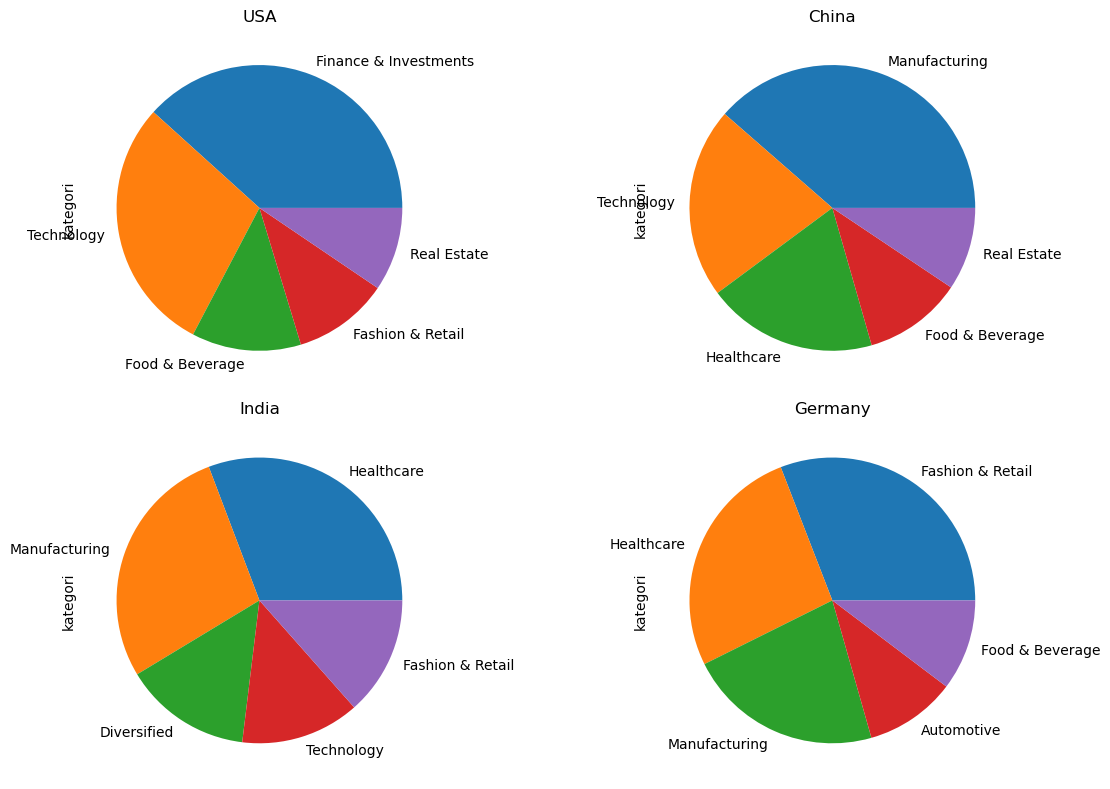

In [162]:
# pandas plot ile çizim

plt.figure(figsize = (12,8))
plt.subplot(221)
df_USA["kategori"].value_counts()[:5].plot(kind = "pie")
plt.title("USA")

plt.subplot(222)
df_China["kategori"].value_counts()[:5].plot(kind = "pie")
plt.title("China")

plt.subplot(223)
df_India["kategori"].value_counts()[:5].plot(kind = "pie")
plt.title("India")

plt.subplot(224)
df_Germany["kategori"].value_counts()[:5].plot(kind = "pie")
plt.title("Germany")

plt.tight_layout();

plt.show()

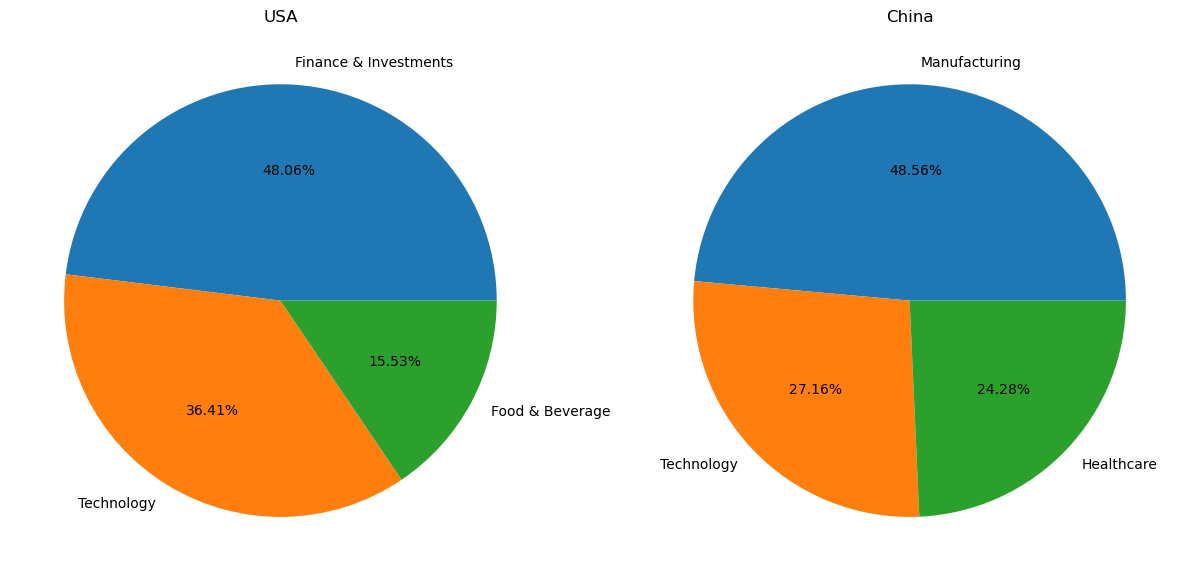

In [165]:
# Matplotlib ile çizim
plt.figure(figsize = (12,8))
plt.subplot(121)
plt.pie(df_USA.kategori.value_counts()[:3], labels = df_USA.kategori.value_counts()[:3].index, autopct = "%1.2f%%")
plt.title("USA")
plt.subplot(122)
plt.pie(df_China.kategori.value_counts()[:3], labels = df_China.kategori.value_counts()[:3].index, autopct = "%1.2f%%")
plt.title("China")
plt.tight_layout();
plt.show()

In [ ]:
## Ilk 10 